<a href="https://colab.research.google.com/github/sandybratu91/my-first-repo/blob/main/Sandu_Bratu_Task1_Spotify_Top_10000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import kagglehub
import os
import matplotlib.pyplot as plt
import seaborn as sns

path = kagglehub.dataset_download("joebeachcapital/top-10000-spotify-songs-1960-now")
print(f"Setul de date a fost descărcat cu succes la calea: {path}")



file_name = os.listdir(path)[0]
file_path = os.path.join(path, file_name)
df = pd.read_csv(file_path)

print("\nInformatii generale despre DataFrame:")
df.info()

Using Colab cache for faster access to the 'top-10000-spotify-songs-1960-now' dataset.
Setul de date a fost descărcat cu succes la calea: /kaggle/input/top-10000-spotify-songs-1960-now

Informatii generale despre DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Track URI             9999 non-null   object 
 1   Track Name            9998 non-null   object 
 2   Artist URI(s)         9997 non-null   object 
 3   Artist Name(s)        9998 non-null   object 
 4   Album URI             9997 non-null   object 
 5   Album Name            9998 non-null   object 
 6   Album Artist URI(s)   9997 non-null   object 
 7   Album Artist Name(s)  9997 non-null   object 
 8   Album Release Date    9997 non-null   object 
 9   Album Image URL       9995 non-null   object 
 10  Disc Number           9999 non-null   int64  
 11  T

In [ ]:
print("\nPrimele 5 rânduri din setul de date:")
print(df.head())


Primele 5 rânduri din setul de date:
                              Track URI  \
0  spotify:track:1XAZlnVtthcDZt2NI1Dtxo   
1  spotify:track:6a8GbQIlV8HBUW3c6Uk9PH   
2  spotify:track:70XtWbcVZcpaOddJftMcVi   
3  spotify:track:1NXUWyPJk5kO6DQJ5t7bDu   
4  spotify:track:72WZtWs6V7uu3aMgMmEkYe   

                                Track Name  \
0  Justified & Ancient - Stand by the Jams   
1          I Know You Want Me (Calle Ocho)   
2       From the Bottom of My Broken Heart   
3         Apeman - 2014 Remastered Version   
4       You Can't Always Get What You Want   

                           Artist URI(s)      Artist Name(s)  \
0  spotify:artist:6dYrdRlNZSKaVxYg5IrvCH             The KLF   
1  spotify:artist:0TnOYISbd1XYRBk9myaseg             Pitbull   
2  spotify:artist:26dSoYclwsYLMAKD3tpOr4      Britney Spears   
3  spotify:artist:1SQRv42e4PjEYfPhS0Tk9E           The Kinks   
4  spotify:artist:22bE4uQ6baNwSHPVcDxLCe  The Rolling Stones   

                              Album URI  

In [ ]:
# Calculează numărul total de melodii și de artiști unici
total_melodii = df.shape[0]
artisti_unici = df['Artist Name(s)'].nunique()
print(f"\nNumăr total de melodii: {total_melodii}")
print(f"Număr de artiști unici: {artisti_unici}")


Număr total de melodii: 9999
Număr de artiști unici: 4129


In [ ]:
# 5 melodii cu cel mai mare scor "Popularity"
top_5_melodii_populare = df.sort_values(by='Popularity', ascending=False).head(5)
print("\nCele mai populare 5 melodii:")
print(top_5_melodii_populare[['Track Name', 'Artist Name(s)', 'Popularity']])


Cele mai populare 5 melodii:
             Track Name            Artist Name(s)  Popularity
2428            vampire            Olivia Rodrigo          98
9077  Cupid - Twin Ver.               FIFTY FIFTY          97
213             Flowers               Miley Cyrus          96
9039    I'm Good (Blue)  David Guetta, Bebe Rexha          95
1224    I Ain't Worried               OneRepublic          95


In [ ]:
# Top 10 artiști
top_10_artisti = df['Artist Name(s)'].value_counts().head(10)
print("\nTop 10 artiști cu cele mai multe melodii:")
print(top_10_artisti)


Top 10 artiști cu cele mai multe melodii:
Artist Name(s)
Taylor Swift          48
P!nk                  45
Elvis Presley         42
Ed Sheeran            40
The Beatles           39
Madonna               39
U2                    39
The Rolling Stones    33
Queen                 31
Katy Perry            30
Name: count, dtype: int64


/tmp/ipython-input-3844678118.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_artisti.index, y=top_10_artisti.values, palette='viridis')


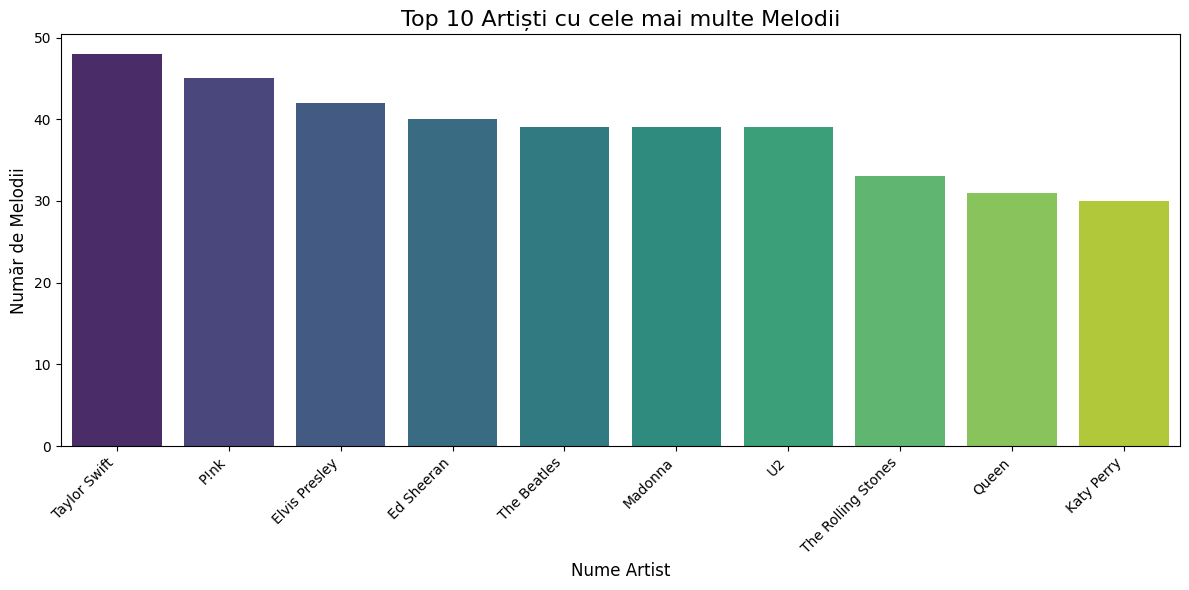

In [ ]:
# Grafic cu bare pentru vizualizare
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_artisti.index, y=top_10_artisti.values, palette='viridis')
plt.title('Top 10 Artiști cu cele mai multe Melodii', fontsize=16)
plt.xlabel('Nume Artist', fontsize=12)
plt.ylabel('Număr de Melodii', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Numărul de melodii explicite pe deceniu:
Deceniu
1950s      0
1960s      0
1970s      3
1980s      4
1990s     45
2000s    144
2010s    221
2020s     74
Name: Explicit, dtype: int64


/tmp/ipython-input-2947443058.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=explicit_per_decade.index, y=explicit_per_decade.values, marker='o', palette='plasma')


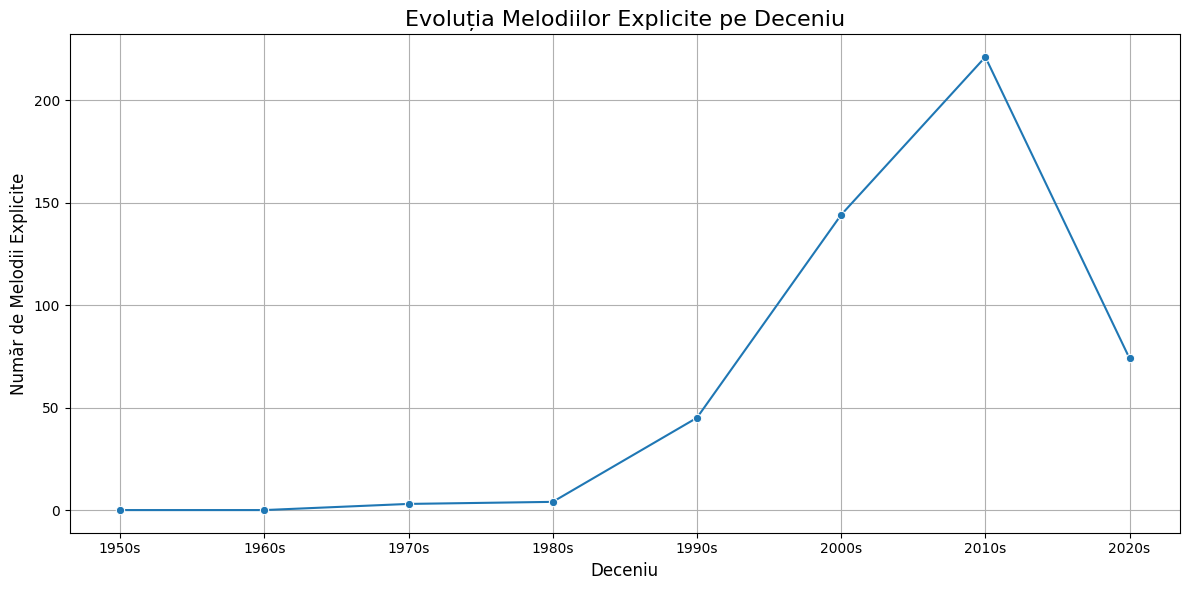

In [ ]:
#Analiza Trendului Melodiilor Explicite
# Introducere în trenduri
# Este interesant de analizat cum s-a schimbat conținutul muzical de-a lungul
# timpului. Vom examina numărul de melodii etichetate ca "explicite"
# de-a lungul deceniilor, pentru a identifica o posibilă evoluție a
# acceptabilității acestui tip de conținut.


df['Album Release Date'] = pd.to_datetime(df['Album Release Date'], errors='coerce')
df['An Lansare'] = df['Album Release Date'].dt.year
df['Deceniu'] = df['An Lansare'].apply(lambda x: f"{int(x // 10) * 10}s" if pd.notna(x) else 'Necunoscut')
explicit_per_decade = df[df['Explicit'] == True].groupby('Deceniu')['Explicit'].count()
ordered_decades = [f"{i}s" for i in range(1950, 2030, 10)]
explicit_per_decade = explicit_per_decade.reindex(ordered_decades, fill_value=0)

print("\nNumărul de melodii explicite pe deceniu:")
print(explicit_per_decade)

# Grafic cu linii pentru a vizualizarea trendului
plt.figure(figsize=(12, 6))
sns.lineplot(x=explicit_per_decade.index, y=explicit_per_decade.values, marker='o', palette='plasma')
plt.title('Evoluția Melodiilor Explicite pe Deceniu', fontsize=16)
plt.xlabel('Deceniu', fontsize=12)
plt.ylabel('Număr de Melodii Explicite', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Concluzie trenduri
# Graficul arată o creștere marcată a melodiilor explicite începând cu
# anii 1990, cu un salt semnificativ în ultimele decade. Acest lucru sugerează o
# schimbare în normele sociale și în conținutul muzical de-a lungul
# timpului, o informație utilă pentru a înțelege piața modernă.

# --------------------------
# Concluzii generale
# --------------------------

# Pe scurt, această analiză ne-a arătat nu doar că putem accesa și
# procesa date în cloud, ci și că putem extrage o poveste din ele.
# Am identificat artiștii de top, cele mai populare melodii și am